# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000+ movies collected from The Movie Database (TMDb), including user ratings and revenue.
> 
> The dataset contains 21 attributes and 10866 observations.
> 
> Some columns in this dataset contains null, missing, and illogical values.

#### Column Names
| id                    | imdb_id           | popularity        | budget       | revenue                 | original_title | cast       | homepage            | director        | tagline | keywords       | overview       | runtime                   | genres      | production_companies       | release_date       | vote_count                  | vote_average       | release_year       | budget_adj                          | revenue_adj                          |
|-----------------------|-------------------|-------------------|--------------|-------------------------|----------------|------------|---------------------|-----------------|---------|----------------|----------------|---------------------------|-------------|----------------------------|--------------------|-----------------------------|--------------------|--------------------|-------------------------------------|--------------------------------------|
| unique row identifier | unique identifier | popularity rating | movie budget | revenue made from movie | movie title    | movie cast | movie home page url | movie directors | tagline | movie keywords | movie synopsis | movie runtime or duration | movie genre | movie production companies | movie release date | movie vote count by viewers | movie vote average | movie release year | movie budget adjusted for inflation | movie revenue adjusted for inflation |

#### Libraries and Packages
 
All the codes are written on Jupyter notebook. The python libraries include `numpy`, `pandas`, `matplotlib` and `seaborn`. Make sure you have all these libraries installed.



### Questions for Analysis
1. Is there a correlation between movie budget and popularity?
2. Does higher popularity translate to higher profits?
3. Which movie has the highest or lowest profit?
4. What effect does runtime have on popularity and the number of vote?
5. What features are associated with movies that have high revenues? 


<a id='wrangling'></a>
## Data Wrangling

### Gather

In [3]:
# Set up import statements for all of the packages for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# Load your data and print out a few lines. 

df_raw = pd.read_csv('data/source/tmdb-movies.csv')


### Assess

Perform operations to inspect the data types and look for instances of missing or possibly errant data.

#### Programmatic Assessment

In [3]:
df_raw.iloc[0:5,:]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# check the rows and columns of this dataset
df_raw.shape

(10866, 21)

In [5]:
# check datatypes to see if there are some wrongly categorized types
df_raw.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# Generate descriptive statistics
df_raw.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


- Missing values.
- Illogical values in the revenue.
- Movies with zero (0) minutes runtime.
- `release_date` column is a string object instead of datetime format.
- Duplicate data detected.
- More columns that required for analysis.


### Clean

#### Define

- Replace missing values with 'no_data'.
- The `budget` column has zero values. Replace them with NaN.
- Drop movies with 0 minutes runtime.
- Change the `release_date` column to datetime format.
- Drop duplicate rows.
- Drop the `imdb_id`, `homepage`, `overview`, `tagline`, `revenue_adj`, and `budget_adj` columns.
- Create a calculated colunn `profit` which is the difference between `revenue` and `budget` for analysis purposes.

#### Code

In [7]:
df_clean = df_raw.copy()

##### Replace missing values with 'no_data'.

In [8]:
# set value to 'no_data' for values with object as data type

df_clean['cast'].fillna('no_data', inplace = True)
df_clean['director'].fillna('no_data', inplace = True) 
df_clean['genres'].fillna('no_data', inplace = True)
df_clean['production_companies'].fillna('no_data', inplace = True)

In [9]:
# Confirm changes

df_clean.loc[(df_clean.cast == 'no_data')].head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,tt4661600,0.422901,0,0,Sanjay's Super Team,no_data,NaN,Sanjay Patel,NaN,...,Sanjay's Super Team follows the daydream of a ...,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.0,0.0
441,355020,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,no_data,http://www.netflix.com/title/80031666,Evgeny Afineevsky,The Next Generation Of Revolution,...,A documentary on the unrest in Ukraine during ...,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.0,0.0
465,321109,tt4393514,0.201696,0,0,Bitter Lake,no_data,NaN,Adam Curtis,NaN,...,An experimental documentary that explores Saud...,135,Documentary,BBC,1/24/15,19,7.8,2015,0.0,0.0


##### Replace 0 values in budget column with NaN.

In [10]:
# budget has no missing data however, 0 values pose a problem when \
# calculating the median - df['budget'].median() \
# replace 0 values with NaN
# this will allow us to calculate the median and \
# comes from an understanding that each movie must have a budget greater than 0
#df['budget'] = df['budget'].replace(0, np.NaN)
df_clean.loc[(df_clean.budget == 0), 'budget'] = np.NaN # replace with nan

In [11]:
# Confirm changes

df_clean[df_clean['budget'].isnull()].head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,NaN,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,NaN,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,NaN,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04


In [12]:
# confirm the null values in the data frame
df_clean.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
homepage                7930
director                   0
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

##### Drop movies with 0 minutes runtime.

In [13]:
# Drop rows with zero values in the runtime column
df_clean.drop(df_clean[df_clean['runtime'] == 0].index, inplace = True)

In [14]:
# Confirm action
df_clean.query('runtime == 0').count().sum()

0

In [15]:
# Generate descriptive statistics
df_clean.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10835.000000,10835.000000,5.167000e+03,1.083500e+04,10835.000000,10835.000000,10835.000000,10835.000000,1.083500e+04,1.083500e+04
mean,65747.954776,0.647757,3.075510e+07,3.993726e+07,102.362898,217.952100,5.976253,2001.296078,1.760010e+07,5.151132e+07
std,91816.027384,1.001158,3.890649e+07,1.171513e+08,30.946957,576.345266,0.935051,12.819389,3.434284e+07,1.448131e+08
min,5.000000,0.000065,1.000000e+00,0.000000e+00,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10586.500000,0.208561,6.000000e+06,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20556.000000,0.384763,1.700000e+07,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75036.000000,0.715444,4.000000e+07,2.417286e+07,112.000000,146.000000,6.600000,2011.000000,2.094485e+07,3.389248e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### Change the `release_date` column to datetime format.

In [16]:
# convert release_date to datetime format
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])
df_clean['release_date'].info();

<class 'pandas.core.series.Series'>
Int64Index: 10835 entries, 0 to 10865
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
10835 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 169.3 KB


##### Drop duplicate rows.

In [17]:
#  check for duplicates
print(df_clean.duplicated().sum())

1


In [18]:
# drop duplicate
df_clean.drop_duplicates(inplace = True)

In [19]:
# confirm  duplicates in the data frame
df_clean.duplicated().sum()

0

##### Drop the `imdb_id`, `homepage`, `overview`, `tagline`, `revenue_adj`, and `budget_adj` columns.

In [20]:
# drop unused columns
# these columns are not useful for our analysis

df_clean.drop(['imdb_id', 'homepage', 'overview', 'tagline', 'revenue_adj', 'budget_adj'], axis = 1, inplace = True) 

In [21]:
# confirm changes
df_clean.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015


##### Create a calculated colunn `profit` which is the difference between `revenue` and `budget` for analysis purposes.

In [22]:
# let us create a new calculated column from existing columns, profit. \
# profit = revenue - budget

df_clean['profit'] = df_clean['revenue'] - df_clean['budget']

In [23]:
df_clean.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,2.284364e+08
2,262500,13.112507,110000000.0,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.852382e+08
3,140607,11.173104,200000000.0,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.868178e+09
4,168259,9.335014,190000000.0,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.316249e+09


#### Save

In [24]:
# save the cleaned dataframe to a csv file
df = pd.DataFrame(df_clean)
df.to_csv('data/clean/tmdb-movies.csv', index = False)

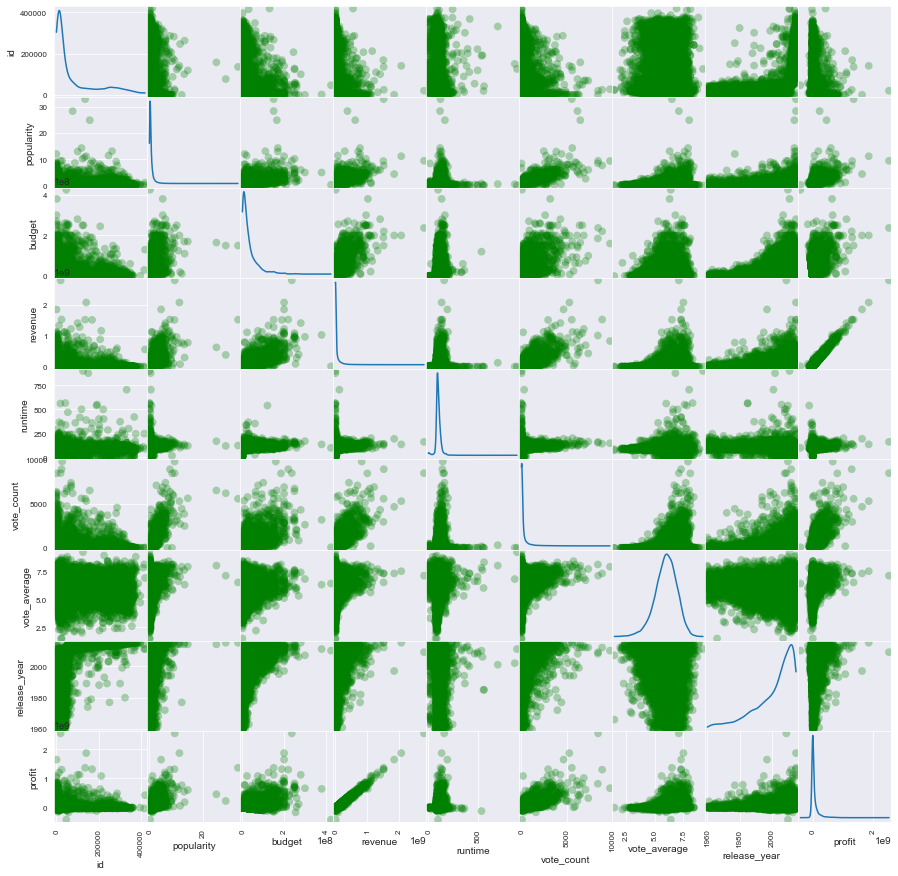

In [25]:
# visualize each variable in the dataframe

pd.plotting.scatter_matrix(df, figsize = (15, 15), diagonal = 'kde', alpha = 0.3, hist_kwds = {'bins': 20}, s = 60, marker = 'o', color = 'green', linewidths = 0.5);

<a id='eda'></a>
## Exploratory Data Analysis



### Load and Inspect Dataset

In [26]:
# Load the cleaned dataset into a dataframe
df = pd.read_csv('data/clean/tmdb-movies.csv')
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09


### Analysis

#### Question 1: Is there a correlation between movie budget and popularity?

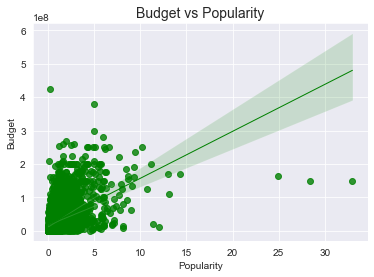

In [27]:
# plot the relationship between budget and popularity

corr_fig = sns.ax = sns.regplot(x=df['popularity'], y=df['budget'],color='green', line_kws={'linewidth':1})
corr_fig.set_title("Budget vs Popularity", fontsize = 14)
corr_fig.set_xlabel("Popularity")
corr_fig.set_ylabel("Budget")
sns.set(rc={'figure.figsize':(15,5)});

In [28]:
# calculate correlation between variables
col1 = df['budget']
col2 = df['popularity']
corr = round(col1.corr(col2),2)
print("The correlation between budget and popularity is: " + str(corr))

The correlation between budget and popularity is: 0.48


This visual does not show a very strong relationship between the budget and the popularity. Let's try to compare the data in another way: create two groups based on median value of budget.

In [29]:
# calculate the median budget and \
# divide the budget into two groups \
# highest_budget and lowest_budget

median_budget = df['budget'].median() # calculate the median budget
lowest_budget = df.query('budget < {}'.format(median_budget))
highest_budget = df.query('budget >= {}'.format(median_budget))

In [30]:
# calculate the popularity mean value of the lowest_budget and highest_budget

lowest_budget_mean_popularity = lowest_budget['popularity'].mean()
highest_budget_mean_popularity = highest_budget['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

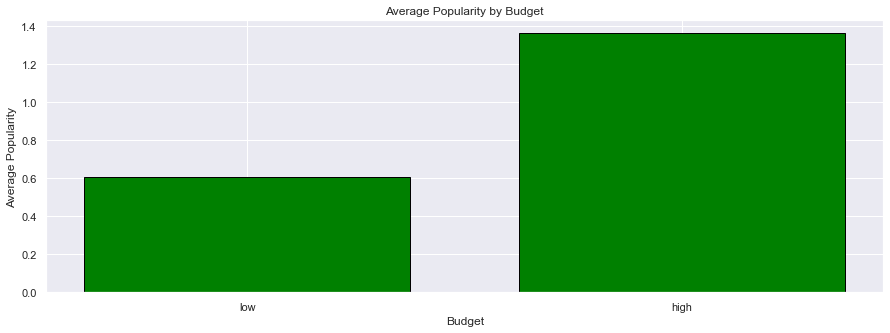

In [31]:
# create a bar chart from the values above

locations = [1, 2]
heights = [lowest_budget_mean_popularity, highest_budget_mean_popularity]
labels = ['low', 'high']
plt.bar(locations, heights, tick_label = labels, width = 0.75, color = 'green', edgecolor = 'black', linewidth = 1)
plt.title('Average Popularity by Budget')
plt.xlabel('Budget')
plt.ylabel('Average Popularity')

In [32]:
# calculate the percentage increase  in popularity

percentage_increase = round(((highest_budget_mean_popularity - lowest_budget_mean_popularity) / highest_budget_mean_popularity) * 100, 2)
percentage_increase

55.48

##### Conclusion for Q1
> In conclusion, we can see from the bar plot, clearly, that a positive correlation exists between movie budget and popularity.
> 
> Movies tend to have higher popularity as the budget increases. The reverse holds true.
> 
> But the existence of a correlation between movie budget and popularity does not necessarily indicate a causal relationship between the variables.

#### Question 2: Does higher popularity translate to higher profits?

In [33]:
# calculate the median of popularity

median_popularity = df['popularity'].median()
lowest_popularity = df.query('popularity < {}'.format(median_popularity))
highest_popularity = df.query('popularity >= {}'.format(median_popularity))

In [34]:
# calculate the average net profit \
# for lowest_popularity and highest_popularity

mean_profit_lowest_popularity = df.query('popularity < {}'.format(median_popularity))['profit'].mean()
mean_profit_highest_popularity = df.query('popularity >= {}'.format(median_popularity))['profit'].mean()

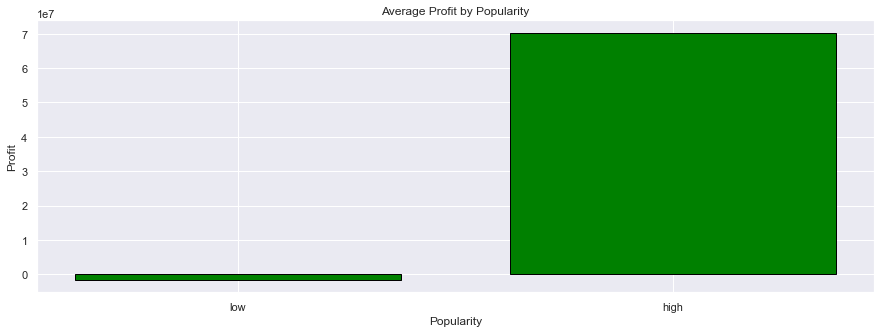

In [35]:
# plot a bar chart from the values above

locations = [1, 2]
heights = [mean_profit_lowest_popularity, mean_profit_highest_popularity]
labels = ['low', 'high']
plt.bar(locations, heights, tick_label = labels, width = 0.75, color = 'green', edgecolor = 'black', linewidth = 1)
plt.title('Average Profit by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Profit');

##### Conclusion for Q2
> In conclusion, we can see from the bar plot, clearly, that higher popularity makes for higher profit

#### Question 3: Which Movie Has The Highest Or Lowest Profit?

In [36]:
def max_min(column):
    """	Calculate the movie with maximum and minimum profit """
    
    max_id = df[column].idxmax() # get the index of the max value
    min_id = df[column].idxmin() # get the index of the min value
    max_value = pd.DataFrame(df.loc[max_id, :]) # get the max value
    min_value = pd.DataFrame(df.loc[min_id, :]) # get the min value
    print('Movie with highest profit: {}'.format(df['original_title'][max_id])) # print the max value
    print('Movie with lowest profit: {}'.format(df['original_title'][min_id])) # print the min value
    return pd.concat([max_value, min_value], axis=1) # return the max and min values


In [37]:
max_min_profit_movies = max_min('profit')
max_min_profit_movies

Movie with highest profit: Avatar
Movie with lowest profit: The Warrior's Way


,1376,2232
id,19995,46528
popularity,9.432768,0.25054
budget,237000000.0,425000000.0
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


##### Conclusion for Q3
> Avatar is the movie with the most profit with 2.5B USD profit realized.
> 
> The Warrior's Way recorded no profit but lost approximately 400M USD.

#### Question 4: What effect does runtime have on popularity?

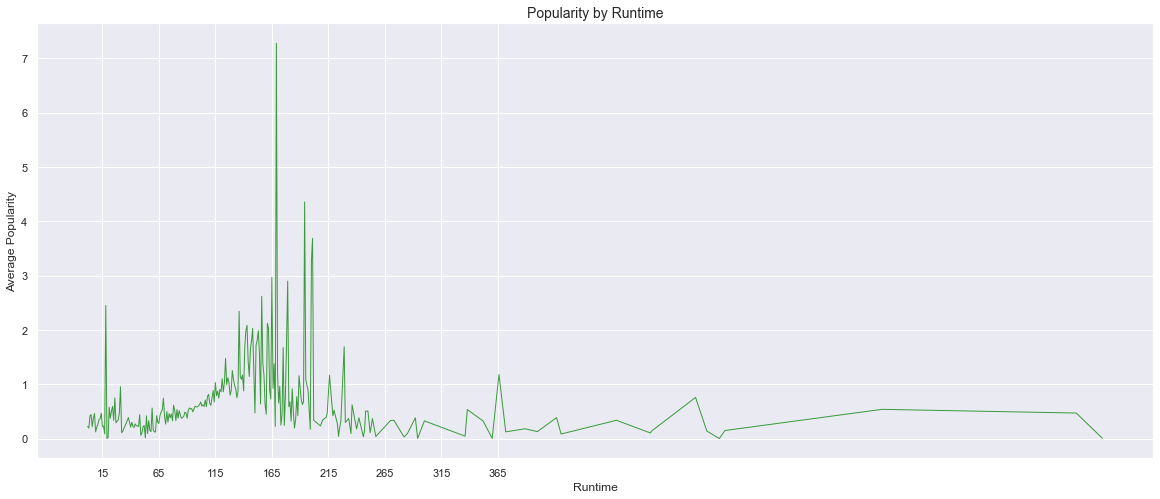

In [38]:
# plot the relationship between the runtime and Popularity

df.groupby('runtime').mean()['popularity'].plot(xticks = range(15, 400, 50), color = 'green', linewidth = 1, alpha = 0.75, figsize = (20, 8))
plt.title('Popularity by Runtime', fontsize = 14)
plt.xlabel('Runtime')
plt.ylabel('Average Popularity');

The movies with the highest popularity tend not be less than 120 minutes or longer than 240 minutes. Below is a bar plot representation without the outlier values.

In [39]:
# I will group movies into 7 categories of runtime \
# 1hr, 2hrs, 3hrs, 4hrs, 5hrs, 6hrs, and above 6hrs \

rt_1hr = df.query('runtime <= {}'.format(60))
rt_2hrs = df.query('runtime <= {}'.format(120))
rt_3hrs = df.query('runtime <= {}'.format(180))
rt_4hrs = df.query('runtime <= {}'.format(240))
rt_5hrs = df.query('runtime > {}'.format(240))
rt_6hrs = df.query('runtime > {}'.format(360))
rt = df.query('runtime > {}'.format(360))

In [40]:
# calculate the mean popularity of each movie runtime category

mean_popularity_rt_1hr = rt_1hr['popularity'].mean()
mean_popularity_rt_2hrs = rt_2hrs['popularity'].mean()
mean_popularity_rt_3hrs = rt_3hrs['popularity'].mean()
mean_popularity_rt_4hrs = rt_4hrs['popularity'].mean()
mean_popularity_rt_5hrs = rt_5hrs['popularity'].mean()
mean_popularity_rt_6hrs = rt_6hrs['popularity'].mean()
mean_popularity_rt = rt['popularity'].mean()

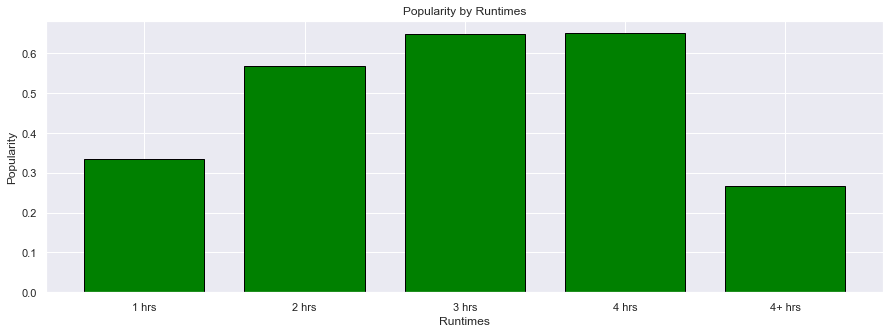

In [41]:
# plot a bar chart from the values above

locations = [1, 2, 3, 4, 5]
heights = [mean_popularity_rt_1hr, mean_popularity_rt_2hrs,
            mean_popularity_rt_3hrs, mean_popularity_rt_4hrs,
            mean_popularity_rt_5hrs]
labels = ['1 hrs', '2 hrs', '3 hrs', '4 hrs', '4+ hrs']
plt.bar(locations, heights, tick_label = labels, width = 0.75, color = 'green', edgecolor = 'black', linewidth = 1)
plt.title('Popularity by Runtimes')
plt.xlabel('Runtimes')
plt.ylabel('Popularity');

**Conclusion Q4:**
> The plots show that movies between 120 minutes and 200 minutes runtime are the most popular among viewers.

#### Question 5: What features are associated with movies that have high revenues?

In [42]:
# Identify the top 10 grossing movies of all time
top_grossing = df.nlargest(10, 'revenue')
top_grossing


,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
1376,19995,9.432768,237000000.0,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.544506e+09
3,140607,11.173104,200000000.0,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.868178e+09
5208,597,4.355219,200000000.0,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,1.645034e+09
4341,24428,7.637767,220000000.0,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,new york|shield|marvel comic|comic|superhero,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,1.299558e+09
0,135397,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09
4,168259,9.335014,190000000.0,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.316249e+09
14,99861,5.944927,280000000.0,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,marvel comic|comic|sequel|superhero|vision,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,1.125036e+09
3359,12445,5.711315,125000000.0,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,self sacrifice|magic|frog|sorcerer|school,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,1.202818e+09
5399,109445,6.112766,150000000.0,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,queen|musical|princess|betrayal|snowman,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013,1.124219e+09
5402,68721,4.946136,200000000.0,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,terrorist|war on terror|tennessee|malibu|marve...,130,Action|Adventure|Science Fiction,Marvel Studios,2013-04-18,6882,6.9,2013,1.015440e+09


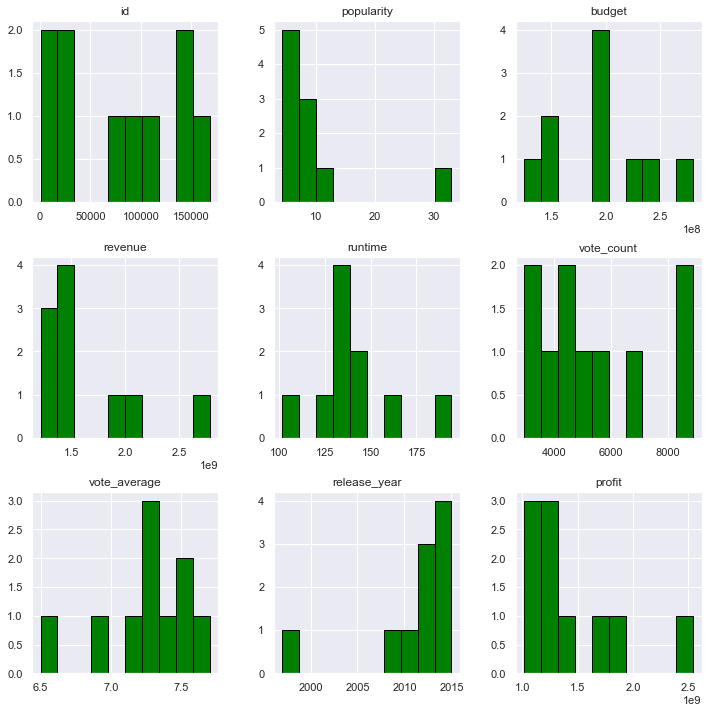

In [43]:

top_grossing.hist(figsize=(12, 12), color = 'green', edgecolor = 'black', linewidth = 1);

In [44]:
# get the movie genres associated with the top 25 grossing movies
top_grossing_genres = (top_grossing)['genres'].str.cat(sep = '|')
genre_data = pd.Series(top_grossing_genres.split('|'), name = 'Top 50 Movie Genres') # split genres by | 
genre_data = pd.DataFrame({'index': genre_data.index, 'genres': genre_data.values})
genre_data.set_index('index', inplace = True) # set index 
genre_data.drop_duplicates(inplace = True) # drop duplicates
genre_data.sort_values(by = 'index')

,genres
index,
0,Action
1,Adventure
2,Fantasy
3,Science Fiction
8,Drama
9,Romance
10,Thriller
19,Crime
25,Family


In [45]:
# get the movie directors associated with the top 25 grossing movies
top_grossing_movie_director = top_grossing.director.str.cat(sep = '|')
director_data = pd.Series(top_grossing_movie_director.split('|'), name = 'Top 50 Movie Directors') # split directors by | 
director_data = pd.DataFrame({'director': director_data.values, 'index': director_data.index})
director_data.set_index('index', inplace = True) # set index
director_data.drop_duplicates(inplace = True) # drop duplicates
director_data.sort_values(by = 'index')

,director
index,
0,James Cameron
1,J.J. Abrams
3,Joss Whedon
4,Colin Trevorrow
5,James Wan
7,David Yates
8,Chris Buck
9,Jennifer Lee
10,Shane Black


In [46]:
# get production companies associated with the top 50 grossing movies
top_grossing_production_companies = top_grossing.production_companies.str.cat(sep = '|')
production_data = pd.Series(top_grossing_production_companies.split('|')) # split production_companies by | 
production_data = pd.DataFrame({'production_companies': production_data.values, 'index': production_data.index})
production_data.set_index('index', inplace = True)
production_data.drop_duplicates(inplace = True)
production_data.sort_values(by = 'index')

,production_companies
index,
0,Ingenious Film Partners
1,Twentieth Century Fox Film Corporation
2,Dune Entertainment
3,Lightstorm Entertainment
4,Lucasfilm
5,Truenorth Productions
6,Bad Robot
7,Paramount Pictures
10,Marvel Studios


**Conclusion: Q5**
 > The top 10 grossing movies have these features.
 1. Runtime is between 100 and 200 minutes.
 2. They were directed by these directors [James Cameron, J.J. Abrams, Joss Whedon, Colin Trevorrow, James Wan, David Yates, Chris Buck, Jennifer Lee, Shane Black]
 3. These movies belonged to these genres [Action, Adventure, Fantasy, Science Fiction, Drama, Romance, Thriller, Crime, Family, Animation]

<a id='conclusions'></a>
## Conclusions

> **Results**: Our data suggests that
> 
> 1. A positive correlation exists between movie budget and popularity. Movies tend to have higher popularity as the budget increases. The reverse holds true.
> But the existence of a correlation between movie budget and popularity does not necessarily indicate a causal relationship between the variables.
> 2. Higher popularity tends to make for higher profit 
> 3. Avatar is the most profitable movie with a recorded profit of 2.5bn USD
> 4. Movies between 120 minutes and 200 minutes runtime are the most popular among viewers.
> 5. Movies with the highest revenues share similar features such as genre, director, and production companies.

> **Limitations**: There are a couple of limitations with our data
> 
> The data has misleading values especially in the budget column which may affect analysis
> 
> The dataset does not provide information on how the popularity and vote_count are measured


In [4]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb', '--to', 'html'])

1

## References

1. https://www.kaggle.com/code/ahmedtobar00/tmdb-investigation
2. https://www.kaggle.com/code/residentmario/indexing-selecting-assigning#Manipulating-the-index